### Introduction to Neural Network Classification in Tensorflow

In [3]:
# DL needs
import tensorflow as tf
import tensorflow.keras as kr

# Data needs
import pandas as pd
from sklearn.model_selection import train_test_split

# Numerical computation needs
import numpy as np

# plotting needs
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# ensuring reproducibility
random_seed=42
tf.random.set_seed(random_seed)

**Creating data to view and fit**

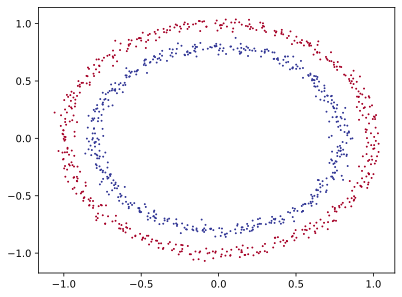

In [4]:
from sklearn.datasets import make_circles

# make 1000 examples
n_samples=1000

# create circles
X,y=make_circles(n_samples=n_samples,
                 noise=0.03,
                 random_state=random_seed
                 )

# visualizing the data
circles = pd.DataFrame({'X0': X[:,0],
                         'X1':X[:,1],
                         'label':y})
circles

plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu,s=1)
plt.show()

**Creating train - test split**

In [5]:
# train-test-split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=random_seed)

# convert into tensors, and reshape correctly
X_train,X_test=tf.constant(X_train,dtype=tf.float32),tf.constant(X_test,dtype=tf.float32)

# creating training and testing datasets
train_dataset=tf.data.Dataset.from_tensor_slices((X_train,y_train))
test_dataset=tf.data.Dataset.from_tensor_slices((X_test,y_test))

# creating train and test loader
batch_size=16
train_loader=train_dataset.shuffle(buffer_size=1000).batch(batch_size=batch_size).prefetch(tf.data.AUTOTUNE)
test_loader=test_dataset.shuffle(len(test_dataset)).prefetch(tf.data.AUTOTUNE)


In [6]:
# creating a model

class ClassNet(kr.Model):
    def __init__(self,lr=0.01,model_name="model_1",metrics=['accuracy']):
        super().__init__(name=model_name)
        # instantiating constructor of parent class

        # input layer:
        self.input_layer=tf.keras.Input(shape=[2,],name='input_layer')

        # hidden layer:
        self.fc1 = kr.layers.Dense(4,activation=None,name='hl1')
        self.fc2 = kr.layers.Dense(4,activation=None,name='hl2')

        # output layer
        self.output_layer=kr.layers.Dense(1,activation=None,name='output_layer')


        # other hyper-params
        # self.loss_function=kr.losses.BinaryCrossentropy
        self.loss_function="binary_crossentropy"
        self.optimizer=kr.optimizers.Adam(learning_rate=lr)
        self.eval_metrics=metrics

    def call(self,inputs):
        # forward propogation
        x=tf.nn.tanh(self.fc1(inputs))
        x=tf.nn.tanh(self.fc2(x))
        output=tf.nn.sigmoid(self.output_layer(x))
        return output

In [7]:
model_1 = ClassNet(model_name='model_1',lr=0.01)
model_1(tf.keras.Input(shape=[2,]))  
model_1.compile(loss=model_1.loss_function,optimizer=model_1.optimizer,metrics=model_1.eval_metrics)
model_1.summary()
history_1=model_1.fit(train_loader,epochs=25)

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hl1 (Dense)                     │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hl2 (Dense)                     │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37 (148.00 B)

 Trainable params: 37 (148.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4952 - loss: 0.7200 
Epoch 2/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5355 - loss: 0.6942
Epoch 3/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5147 - loss: 0.6909
Epoch 4/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5605 - loss: 0.6869
Epoch 5/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5986 - loss: 0.6842
Epoch 6/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5965 - loss: 0.6799
Epoch 7/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6111 - loss: 0.6732
Epoch 8/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5547 - loss: 0.6740
Epoch 9/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5701 - loss: 0.6726
Epoch 10/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5783 - loss: 0.6620
Epoch 11/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5761 - loss: 0.6680
Epoch 12/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5622 - l

**4. Classification Evaluation Methods**

* **Accuracy** = (total true predictions) / (Total predictions) 
            = `(TP + TN)/(TP+TN+FP+FN)`
  * Default metric for classification problems. Not best suited for imbalanced classes
  * lies between 0 and 1
  * `tf.keras.metrics.Accuracy()` or `sklearn.metrics.accuracy_score()`
  
* **Precision** = (true positives) / (total positive predictions) 
            = `(TP)/(TP+FP)`
  * Higher precision leads to less false positives
  * lies between 0 and 1
  * `tf.keras.metrics.Precision()` or `sklearn.metrics.precision_score()`
  
* **Recall** = (true positives) / (Actual positives) 
            = `(TP)/(TP+FN)`
  * Higher recall leads to less false negatives
  * Also called True Positive Rate (TPR) and Sensitivity
  * lies between 0 and 1
  * `tf.keras.metrics.Recall()` or `sklearn.metrics.recall_score()`

* **F1-score** = `2*((P*R)/(P+R))`
  * Harmonic mean of precision and recall
  * lies between 0 and 1
  * `sklearn.metrics.f1_score()`

* **Confusion Matrix:**
  * Used to compare predictions to truth labels to see where the model gets confused. 
  * Can be hard to use for large number of classes
  * `sklearn.metrics.confusion_matrix()`

* **ROC (Receiver Operator Characteristics) Curve and Area Under ROC curve**
  * Plot of TPR vs FPR for different values of threshold of classifier
  * TPR = (true positives) / (Actual positives ) = `(TP)/(TP+FN)` 
    * lies between 0 and 1
  * FPR = (false positives) / (Actual positives ) = `(FP)/(TP+FN)`
    * lies between 0 and 1
  * Area Under Curve lies between 0 and 1 (should be greater than 0.5 to avoid random classification)

**Note:** 
* We cannot have both precision high at the same time, there would always be a trade-off between the two.
* classification report (from sklearn) is another tool

In [10]:
# 1.) accuracy
loss,accuracy = model_1.evaluate(X_test,y_test)
print(f"Model loss on test set: {loss}\nModel accuracy on test set: {accuracy*100:.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9765 - loss: 0.2672 
Model loss on test set: 0.2678525447845459
Model accuracy on test set: 98.50%


In [35]:
# 2.) confusion matrix
from sklearn.metrics import confusion_matrix
from functools import partial
y_pred=model_1.predict(X_test,verbose=0)

print(y_test[:10])
print()
print(y_pred[:10])

# we need to convert predictions from probabilities to classes
threshold=lambda x,thresh: 1 if x>thresh else 0

thresh=0.5

cm=confusion_matrix(y_test,list(map(partial(threshold,thresh=thresh),y_pred)))
cm

[1 0 1 0 1 1 0 0 1 0]

[[0.9491864 ]
 [0.29129758]
 [0.80591244]
 [0.209039  ]
 [0.7675582 ]
 [0.6783801 ]
 [0.26033786]
 [0.12404381]
 [0.7011775 ]
 [0.25659868]]


array([[ 97,   3],
       [  0, 100]])

In [65]:
# prettifying confusion matrix
import itertools

def plot_confusion_matrix(confusion_matrix,figsize = (4,4),classes = None,title_size = 15 ,label_size = 10, text_size = 8):
    # create the confusion matrix
    cm_norm=confusion_matrix.astype("float") / confusion_matrix.sum(axis=1)[:,np.newaxis] # normalize confusion matrix
    n_classes = confusion_matrix.shape[0]

    fig,ax=plt.subplots(figsize=figsize)

    # create a matrix plot
    cax=ax.matshow(confusion_matrix,cmap=plt.cm.Blues) 
    fig.colorbar(cax)

    # Create classes
    if classes:
        labels = classes
    else:
        labels=np.arange(confusion_matrix.shape[0])

    # label the axes
    ax.set(title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels
        )

    # getting the x-axis labels to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # adjust label size
    ax.yaxis.label.set_size(label_size)
    ax.xaxis.label.set_size(label_size)

    # adjust title size
    ax.title.set_size(title_size)

    # set the threshold for different colors
    threshold = (confusion_matrix.max() + confusion_matrix.min())/2.0

    # plot the text on each cell 
    for i,j in itertools.product(range(confusion_matrix.shape[0]),range(confusion_matrix.shape[1])):
        plt.text(j,i,f"{confusion_matrix[i,j]} ({cm_norm[i,j]*100:.2f}%)",
                horizontalalignment = "center",
                verticalalignment = "center",
                color = "white" if confusion_matrix[i,j]>threshold else "black",
                size = text_size)
    
    plt.show()

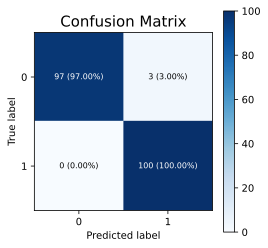

In [66]:
plot_confusion_matrix(cm)